# Outline<a class = "anchor" id = "outline"></a>
1. [Install dependencies](#install)
2. [Import libraries](#libraries)
3. [Custom functions](#functions)
4. [Read data](#readData)
5. [Clean data](#clean)
6. [Data Exploration and visualization](#explore)
7. [Machine learning model without sampling](#ml_no_sampling)
8. [Machine learning model with sampling](#ml_sampling)
9. [Summary and conclusion](#summary)

# Installing dependencies<a class = anchor id = "install"></a>
[Go to top](#outline)

In [54]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 660.6 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/235.6 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/235.6 kB 563.7 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/235.6 kB 853.3 kB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.0 MB/s eta 0:00:00


[Go to top](#outline)

# Import the libraries<a class = "anchor" id = "libraries"></a>
[Go to top](#outline)

In [9]:
# importing the libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

[Go to top](#outline)

# Custom Functions<a class = "anchor" id = "functions"></a>
[Go to top](#outline)

In [118]:
def best_k_value(x_train, x_test, y_train, y_test):
    '''
    Finds out the optimum value of k for KNN classification,
    i.e which value of k gives the highest value for both training and testing datasets
    '''
    k_values = range(1,21)
    training_accuracies = []
    testing_accuracies = []
    
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(x_train, y_train)
        training_accuracies.append(model.score(x_train, y_train))
        testing_accuracies.append(model.score(x_test, y_test))
    
    k_df = pd.DataFrame({"k":k_values,
                         "training_accuracy":training_accuracies,
                         "testing_accuracy": testing_accuracies
                        })
    
    fig = px.line(data_frame = k_df,
                  x = "k",
                  y = ["training_accuracy", "testing_accuracy"],
                 )
    fig.update_layout(xaxis_title = "K", yaxis_title = "Accuracy")
    fig.show()
    

In [119]:
def best_weight(k, x_train, x_test, y_train, y_test):
    '''
    For the best k value, what is the accuracy for when all data points have equal weights,
    and what is the accuracy when closer neighbors are given more weight. 
    '''
    for weight in ['uniform', 'distance']:
        model = KNeighborsClassifier(n_neighbors = k, weights = weight)
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)
        print(f"weight: {weight} accuracy: {accuracy}")
    

In [11]:
def create_confusion_matrix(y_test, y_pred):
    '''
    Creates a confusion matrix between the predicted and actual labels
    '''
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True)
    plt.xlabel("Actual Class")
    plt.ylabel("Predicted Class")
    plt.title("Confusion Matrix")

In [12]:
def print_classification_report(y_test, y_pred):
    '''
    Prints the classification report - Precision, Recall, f1 score,
    average, weighted average
    '''
    print(classification_report(y_test, y_pred))

In [19]:
def print_training_and_testing_accuracy(x_train, x_test, y_train, y_test, model):
    '''
    Prints the accuracy for the training and testing datasets
    '''
    print("Training_accuracy: ", model.score(x_train, y_train))
    print("Testing accuracy: ", model.score(x_test, y_test))

[Go to top](#outline)

# Read the data into a dataframe<a class = "anchor" id = "readData"></a>
[Go to top](#outline)

In [2]:
# reading the csv file into a pandas dataframe
df = pd.read_csv("Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


[Go to top](#outline)

# Initial Data Cleaning<a class = "anchor" id = "clean"></a>
[Go to top](#outline)

In [3]:
# deleting the id column as it is not required for classification
df = df.drop("ID", axis = 1)
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


[Go to top](#outline)

# Data Exploration and Visualization<a class = "anchor" id = "explore"></a>
[Go to top](#outline)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     108 non-null    int64  
 1   Gender  108 non-null    object 
 2   Height  108 non-null    int64  
 3   Weight  108 non-null    int64  
 4   BMI     108 non-null    float64
 5   Label   108 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.2+ KB


In [128]:
df.describe()

,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000
mean,46.555556,166.574074,59.490741,20.549074
std,24.720620,27.873615,28.856233,7.583818
min,11.000000,120.000000,10.000000,3.900000
25%,27.000000,140.000000,35.000000,16.700000
50%,42.500000,175.000000,55.000000,21.200000
75%,59.250000,190.000000,85.000000,26.100000
max,112.000000,210.000000,120.000000,37.200000


In [6]:
class_count = df['Label'].value_counts().to_frame().reset_index()

fig = px.bar(data_frame = class_count,
             x = "Label",
             y = "count",
             title = "Class count"
            )

fig.update_layout()

fig.show()

In [18]:
gender_count = df['Gender'].value_counts().to_frame().reset_index()

fig = px.pie(data_frame = gender_count,
             names = "Gender",
             values = "count",
             title = "Gender distribution",
             color_discrete_sequence = ["#0D98BA", "#BC7D5E"]
            )

fig.update_layout(width=500,height=500)

fig.show()

In [15]:
fig = px.histogram(data_frame = df,
                   x = "Label",
                   color = "Gender",
                   title = "Number of people belonging to a weight category by gender",
                   barmode = "group",
                   color_discrete_sequence = ["#6E3562", "#DFB160"]
                  )
fig.show()

In [32]:
for col in df.columns:
    if df[col].dtype != 'object':
        fig = px.box(data_frame = df,
                     x = col,
                     y = "Label",
                     title = f"Distribution of {col} for for each class",
                     color = "Label"
                    )
        fig.show()

In [51]:
fig = px.scatter(data_frame = df,
                 y = "Height",
                 x = "Weight",
                 title = "Relationship between height and weight"
    
          )
fig.show()

Text(0.5, 1.0, 'Correlation between features of the dataset')

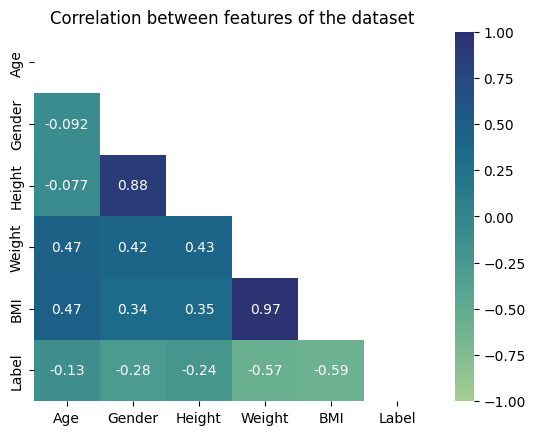

In [46]:
le = LabelEncoder()
df_corr = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_corr[col] = le.fit_transform(df_corr[col])
correlation_matrix = df_corr.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot = True, cmap="crest", mask = mask)
plt.title("Correlation between features of the dataset")

[Go to top](#outline)

# Building machine learning model - without sampling<a class = "anchor" id = "ml_no_sampling"></a>
[Go to top](#outline)

In [4]:
# label encoding the gender column
# male = 1
# female = 0
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,Normal Weight
1,30,0,160,60,22.5,Normal Weight
2,35,1,180,90,27.3,Overweight
3,40,0,150,50,20.0,Underweight
4,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,1,175,10,3.9,Underweight
104,16,0,160,10,3.9,Underweight
105,21,1,180,15,5.6,Underweight
106,26,0,150,15,5.6,Underweight


In [5]:
# splitting the input and output
X = df.drop("Label", axis=1)
y = df["Label"]
print(X,"\n")
print(y)

     Age  Gender  Height  Weight   BMI
0     25       1     175      80  25.3
1     30       0     160      60  22.5
2     35       1     180      90  27.3
3     40       0     150      50  20.0
4     45       1     190     100  31.2
..   ...     ...     ...     ...   ...
103   11       1     175      10   3.9
104   16       0     160      10   3.9
105   21       1     180      15   5.6
106   26       0     150      15   5.6
107   31       1     190      20   8.3

[108 rows x 5 columns] 

0      Normal Weight
1      Normal Weight
2         Overweight
3        Underweight
4              Obese
           ...      
103      Underweight
104      Underweight
105      Underweight
106      Underweight
107      Underweight
Name: Label, Length: 108, dtype: object


In [21]:
# splitting into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
print(x_train,"\n")
print(y_train, "\n")
print(x_test, "\n")
print(y_test, "\n")

    Age  Gender  Height  Weight   BMI
16   48       1     200     100  31.2
66   56       1     210      95  27.0
90   48       0     130      40  16.7
93   12       1     175      15   5.6
77   60       0     120      70  23.4
..  ...     ...     ...     ...   ...
3    40       0     150      50  20.0
2    35       1     180      90  27.3
6    55       1     200     110  34.2
27  103       0     130      30  13.3
75   50       0     130      60  22.5

[75 rows x 5 columns] 

16            Obese
66       Overweight
90      Underweight
93      Underweight
77    Normal Weight
          ...      
3       Underweight
2        Overweight
6             Obese
27      Underweight
75    Normal Weight
Name: Label, Length: 75, dtype: object 

     Age  Gender  Height  Weight   BMI
36    59       1     210     115  30.8
21    73       0     160      60  22.5
19    63       0     120      30  13.3
98    37       0     140      25  10.0
39    22       0     160      45  18.7
14    38       1     190

In [98]:
best_k_value(x_train, x_test, y_train, y_test)

In [99]:
best_weight(3, x_train, x_test, y_train, y_test)

weight: uniform accuracy: 0.9393939393939394
weight: distance accuracy: 0.9393939393939394


In [100]:
# it does not matter if uniform weights are considered or not. Both give the same accuracy. 

# creating the model
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array(['Obese', 'Normal Weight', 'Underweight', 'Underweight',
       'Underweight', 'Overweight', 'Underweight', 'Normal Weight',
       'Obese', 'Underweight', 'Underweight', 'Normal Weight',
       'Overweight', 'Underweight', 'Underweight', 'Obese', 'Obese',
       'Underweight', 'Underweight', 'Underweight', 'Underweight',
       'Normal Weight', 'Normal Weight', 'Underweight', 'Normal Weight',
       'Underweight', 'Normal Weight', 'Overweight', 'Underweight',
       'Normal Weight', 'Underweight', 'Underweight', 'Overweight'],
      dtype=object)

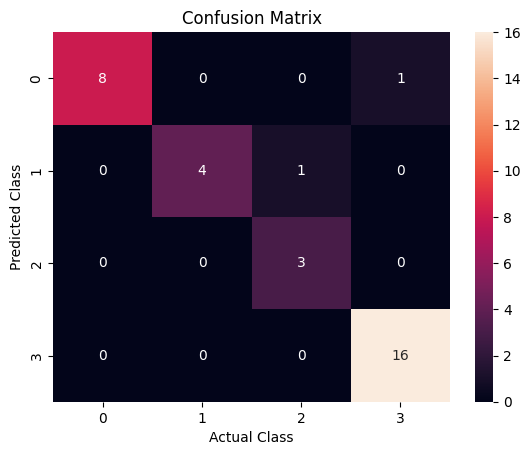

In [101]:
create_confusion_matrix(y_test, y_pred)

In [107]:
print_classification_report(y_test, y_pred)

               precision    recall  f1-score   support

Normal Weight       1.00      0.89      0.94         9
        Obese       1.00      0.80      0.89         5
   Overweight       0.75      1.00      0.86         3
  Underweight       0.94      1.00      0.97        16

     accuracy                           0.94        33
    macro avg       0.92      0.92      0.91        33
 weighted avg       0.95      0.94      0.94        33



In [108]:
print_traning_and_testing_accuracy(x_train, x_test, y_train, y_test)

Training_accuracy:  0.96
Testing accuracy:  0.9393939393939394


[Go to top](#outline)

# Building machine learning model - with sampling<a class = "anchor" id = "ml_sampling"></a>
[Go to top](#outline)

In [6]:
smote = SMOTE(random_state = 12)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [110]:
y_resampled.value_counts()

Label
Normal Weight    47
Overweight       47
Underweight      47
Obese            47
Name: count, dtype: int64

In [7]:
# splitting into training and testing dataset
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 12)

In [112]:
best_k_value(x_train_s, x_test_s, y_train_s, y_test_s)

In [113]:
best_weight(3, x_train_s, x_test_s, y_train_s, y_test_s)

weight: uniform accuracy: 0.9298245614035088
weight: distance accuracy: 0.9122807017543859


In [114]:
model_sample = KNeighborsClassifier(n_neighbors = 3, weights = "uniform")
model_sample.fit(x_train_s, y_train_s)
y_sample_pred = model_sample.predict(x_test_s)
y_sample_pred

array(['Underweight', 'Overweight', 'Overweight', 'Underweight',
       'Normal Weight', 'Overweight', 'Obese', 'Underweight',
       'Underweight', 'Normal Weight', 'Overweight', 'Overweight',
       'Underweight', 'Overweight', 'Normal Weight', 'Overweight',
       'Obese', 'Normal Weight', 'Underweight', 'Underweight',
       'Normal Weight', 'Obese', 'Obese', 'Normal Weight', 'Obese',
       'Normal Weight', 'Underweight', 'Overweight', 'Normal Weight',
       'Underweight', 'Overweight', 'Obese', 'Normal Weight',
       'Overweight', 'Overweight', 'Obese', 'Obese', 'Obese',
       'Normal Weight', 'Normal Weight', 'Normal Weight', 'Overweight',
       'Underweight', 'Overweight', 'Underweight', 'Obese',
       'Normal Weight', 'Underweight', 'Overweight', 'Underweight',
       'Overweight', 'Overweight', 'Underweight', 'Obese',
       'Normal Weight', 'Underweight', 'Obese'], dtype=object)

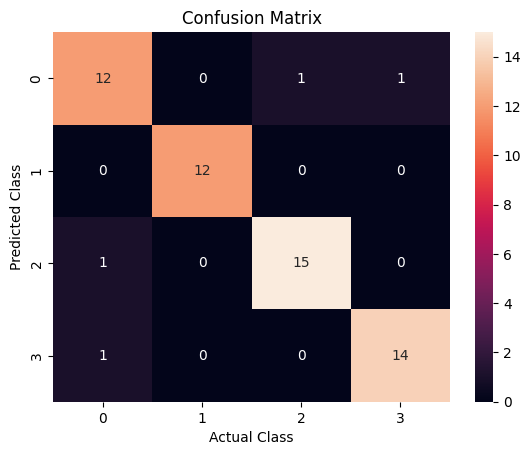

In [115]:
create_confusion_matrix(y_test_s, y_sample_pred)

In [116]:
print_classification_report(y_test_s, y_sample_pred)


               precision    recall  f1-score   support

Normal Weight       0.86      0.86      0.86        14
        Obese       1.00      1.00      1.00        12
   Overweight       0.94      0.94      0.94        16
  Underweight       0.93      0.93      0.93        15

     accuracy                           0.93        57
    macro avg       0.93      0.93      0.93        57
 weighted avg       0.93      0.93      0.93        57



In [117]:
print_traning_and_testing_accuracy(x_train_s, x_test_s, y_train_s, y_test_s)

Training_accuracy:  0.9541984732824428
Testing accuracy:  0.9473684210526315


[Go to top](#outline)

# Summary and conclusion<a class = "anchor" id = "summary"></a>
[Go to top](#outline)

1. Dataset is imbalanced.
2. Data was balanced using SMOTE oversampling.
3. There are 4 classes in the dataset - underweight, normal weight, over weight and obese
4. The dataset has slightly more males than females.
5. There are no obese females. More females are underweight. More males are normal weight and over weight when compared to females.
6. There are 2 outliers present in the age column. None of the other numerical columns have outliers.
7. The height data is extremely spread out for overweight people. That means short, normal, and tall people can be overweight.
8. The median age of underweight people is 31, median age for over weight people are 54, median age for obese people is 60
9. Ideal value of k is 3 whether the data is sampled or not.
10. when data is not sampled, the same accuracy was achieved using uniform and distance weights - so it does not matter.
11. when data is sampled, higher accuracy was achieved using uniform weights when compared to distance weights. 
12. when data is not sampled, the accuracy of training and testing is 96% and 94% approx
13. when data is sampled the training and testing accuracies are both 95% approx.
14. Sampling the data reduced the traning accuracy by 1% and increased the testing accuracy by 1%. So sampling improved the overall balance. 

[Go to top](#outline)

# NAIVE BAYES - WITHOUT SAMPLING

In [22]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)
y_pred_nb

array(['Obese', 'Normal Weight', 'Underweight', 'Underweight',
       'Underweight', 'Obese', 'Underweight', 'Normal Weight', 'Obese',
       'Underweight', 'Underweight', 'Normal Weight', 'Overweight',
       'Underweight', 'Underweight', 'Obese', 'Obese', 'Underweight',
       'Underweight', 'Underweight', 'Normal Weight', 'Normal Weight',
       'Overweight', 'Underweight', 'Normal Weight', 'Underweight',
       'Normal Weight', 'Obese', 'Underweight', 'Normal Weight',
       'Underweight', 'Underweight', 'Obese'], dtype='<U13')

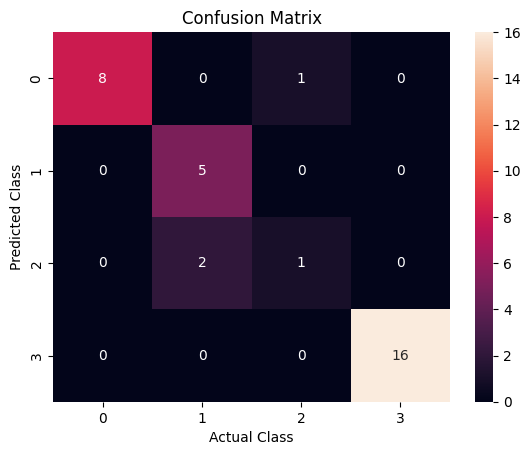

In [23]:
create_confusion_matrix(y_test, y_pred_nb)

In [24]:
print_classification_report(y_test, y_pred_nb)

               precision    recall  f1-score   support

Normal Weight       1.00      0.89      0.94         9
        Obese       0.71      1.00      0.83         5
   Overweight       0.50      0.33      0.40         3
  Underweight       1.00      1.00      1.00        16

     accuracy                           0.91        33
    macro avg       0.80      0.81      0.79        33
 weighted avg       0.91      0.91      0.90        33



In [25]:
print_training_and_testing_accuracy(x_train, x_test, y_train, y_test, model_nb)

Training_accuracy:  0.9066666666666666
Testing accuracy:  0.9090909090909091


# NAIVE BAYES - WITH SAMPLING

In [10]:
model_nb_sample = GaussianNB()
model_nb_sample.fit(x_train_s, y_train_s)
y_pred_nb_sample = model_nb_sample.predict(x_test_s)
y_pred_nb_sample

array(['Underweight', 'Overweight', 'Overweight', 'Underweight',
       'Normal Weight', 'Overweight', 'Obese', 'Underweight',
       'Underweight', 'Normal Weight', 'Obese', 'Overweight',
       'Underweight', 'Obese', 'Normal Weight', 'Overweight', 'Obese',
       'Normal Weight', 'Normal Weight', 'Underweight', 'Underweight',
       'Obese', 'Obese', 'Normal Weight', 'Obese', 'Normal Weight',
       'Underweight', 'Overweight', 'Normal Weight', 'Underweight',
       'Overweight', 'Obese', 'Normal Weight', 'Overweight', 'Overweight',
       'Obese', 'Obese', 'Obese', 'Normal Weight', 'Normal Weight',
       'Normal Weight', 'Overweight', 'Underweight', 'Overweight',
       'Underweight', 'Obese', 'Normal Weight', 'Underweight',
       'Overweight', 'Underweight', 'Overweight', 'Overweight',
       'Underweight', 'Obese', 'Normal Weight', 'Underweight', 'Obese'],
      dtype='<U13')

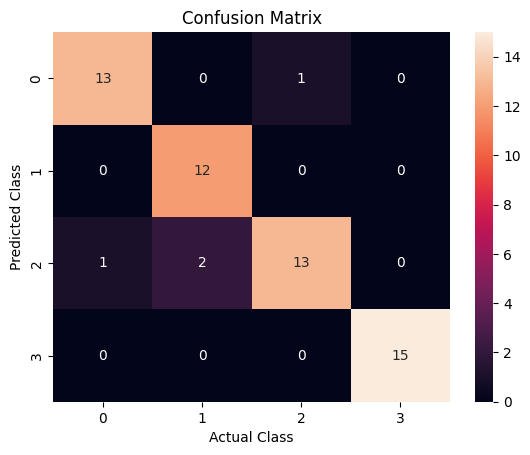

In [14]:
create_confusion_matrix(y_test_s, y_pred_nb_sample)

In [15]:
print_classification_report(y_test_s, y_pred_nb_sample)

               precision    recall  f1-score   support

Normal Weight       0.93      0.93      0.93        14
        Obese       0.86      1.00      0.92        12
   Overweight       0.93      0.81      0.87        16
  Underweight       1.00      1.00      1.00        15

     accuracy                           0.93        57
    macro avg       0.93      0.94      0.93        57
 weighted avg       0.93      0.93      0.93        57



In [20]:
print_training_and_testing_accuracy(x_train_s, x_test_s, y_train_s, y_test_s, model_nb_sample)

Training_accuracy:  0.9389312977099237
Testing accuracy:  0.9298245614035088
